# **Naive Bayes Classifier**

> ### Mitul Agrawal

Drive Link : [PRML Lab 4 Drive](https://drive.google.com/drive/folders/1dqXlFbn4Wsn_4pZS6RQ9DgTznZO6EgQP?usp=sharing)

In [ ]:
from google.colab import drive
#drive.mount('/content/drive/')

path = '/content/drive/My Drive/PRML/Lab 4/'

##Naive Bayes Classifier

###1) Preprocessing & Visualization

####Importing

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import time

df = pd.read_csv(path+'titanic.csv')

df.head(4)

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1


####Cleaning

In [ ]:
df = pd.read_csv(path+'titanic.csv')

df = df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)

def remove_missing(df) : 
  remove = []
  for i, row in df.iterrows():
    if row.isna().values.any() : remove.append(i)
  df.drop(remove,axis=0,inplace=True)

def fill_missing(df) : 
  for col in df : 
    df[col].fillna((df[col].mode()), inplace=True)

def remove_mismatch(df) : 
  for col in df : 
    df.reset_index(drop=True, inplace=True)
    s = [False]*len(df[col])
    for i,cell in enumerate(df[col]) : 
      try : n = int(cell)
      except : s[i] = True
    t = s.count(True)
    f = s.count(False)
    st = False
    if(t>f) : st = True
    remove = [i for i in range(len(df[col])) if s[i]!=st]
    df.drop(remove,axis=0,inplace=True)

def fill_mismatch(df) : 
  for col in df : 
    s = [False]*len(df[col])
    for i,cell in enumerate(df[col]) : 
      try : n = int(cell)
      except : s[i] = True
    t = s.count(True)
    f = s.count(False)
    st = False
    if(t>f) : st = True
    for i in range(len(df[col])) : 
      if(s[i]!=st) : 
        try : 
          df[col][i] = df[col].median()
        except :
          df[col][i] = df[col].mode()

def str_to_num(df) : 
  for col in df : 
    try : df[col] = pd.to_numeric(df[col])
    except : pass

str_to_num(df)

fill_missing(df)

fill_mismatch(df)

str_to_num(df)

df.head(4)

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1


####Visualization

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sb

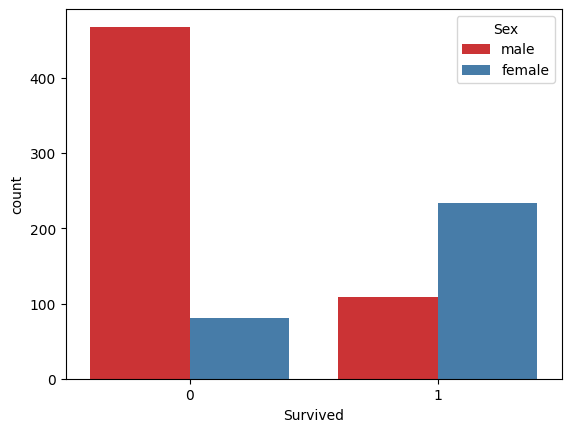

In [ ]:
sb.countplot(x='Survived', hue = 'Sex', data = df, palette = 'Set1')

Text(0.5, 1.0, 'Age')

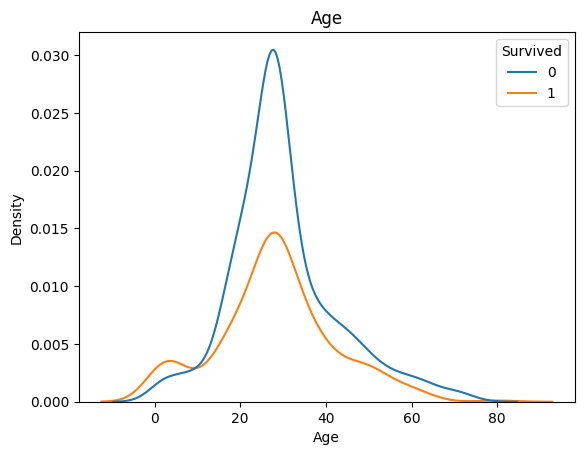

In [ ]:
sb.kdeplot(x ='Age', hue='Survived', data = df, color = 'black').set_title('Age')

Text(0.5, 1.0, 'Fare')

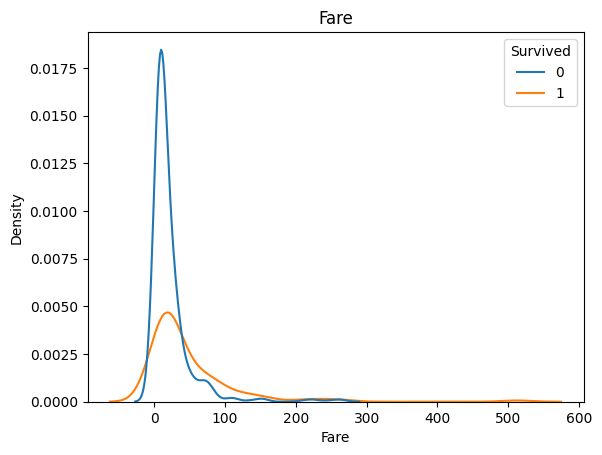

In [ ]:
sb.kdeplot(x ='Fare', hue='Survived', data = df, color = 'black').set_title('Fare')

Text(0.5, 1.0, 'Age vs Fare')

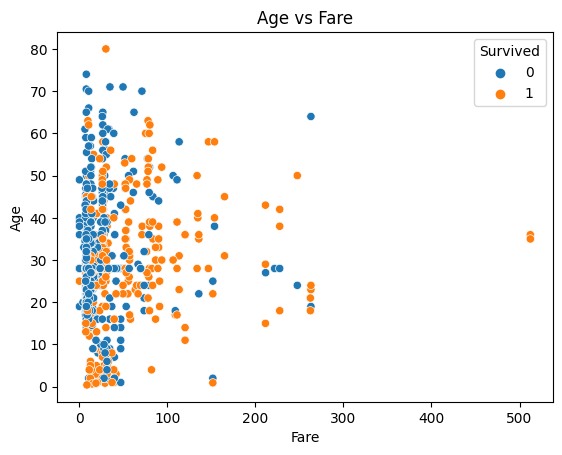

In [ ]:
sb.scatterplot(x ='Fare', y='Age',hue='Survived', data = df, color = 'black').set_title('Age vs Fare')

####Encoding & Normalization

In [ ]:
def encode_label(df,col,order) : 
  if(order==[]) : order = list(df[col].unique())
  for i,cell in enumerate(df[col]) : 
    try : 
      df.at[i,col] = order.index(df[col][i])
    except : 
      df.at[i,col] = -1

def encode_labels(df,cols) : 
  for col in cols.keys() : 
    encode_label(df,col,cols[col])

labels = {}
labels['Embarked'] = []
labels['Sex'] = []
 
encode_labels(df,labels)

str_to_num(df)


def normalize_dbl(df,cols,round=None) : 
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    l = max(df[col])
    if round is None : df[col] = df[col].div(l)
    else : df[col] = df[col].div(l).round(round)

normalize_dbl(df,cols=['Age','Fare'])


df.head(4)

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0,0.2750,0.014151,0,0
1,1,1,0.4750,0.139136,1,1
2,3,1,0.3250,0.015469,0,1
3,1,1,0.4375,0.103644,0,1


####Splitting

In [ ]:
x = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=11) 

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print("Train Data   :",x_train.shape)
print("Train Labels :",y_train.shape)
print()
print("Test Data    :",x_test.shape)
print("Test Labels  :",y_test.shape)

Train Data   : (712, 5)
Train Labels : (712,)

Test Data    : (179, 5)
Test Labels  : (179,)


###2) Best Variant of Naive Bayes Classifier

####Accuracy on Inbuilt Naive Bayer Variants

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("Gaussian :",(y_test==y_pred).sum()/x_test.shape[0])

nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("Multinomial :",(y_test==y_pred).sum()/x_test.shape[0])

nb = ComplementNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("Complement :",(y_test==y_pred).sum()/x_test.shape[0])

nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("Bernoulli :",(y_test==y_pred).sum()/x_test.shape[0])

nb = CategoricalNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("Categorical :",(y_test==y_pred).sum()/x_test.shape[0])

Gaussian : 0.8268156424581006
Multinomial : 0.8324022346368715
Complement : 0.8324022346368715
Bernoulli : 0.8324022346368715
Categorical : 0.8379888268156425


#### Choice - Categorical Naive Bayes

The data given has mostly categorical data with two continuous features.
It makes more sense binning the continuous features and using categorical NB rather than gaussian NB where we treat even categorical features as continuous

Also the best Test Accuracy is on Categorical Naive Bayes out of 5 variants

###3) Categorical Naive Bayes Classifier

####Naive Bayers Class

In [ ]:
class NaiveBayes :

  def __init__(self,alpha=1,bins=3) : 
    self.prior = {}
    self.likelihood = {}
    self.alpha = alpha
    self.bins = bins
    self.bin = {}
    self.wc = {}

  def discretize(self,df,col,binsize=None,bins=None,mn=None,mx=None) :
    if bins is None : bins = self.bins
    if mn is None : mn = min(df[col])
    if mx is None : mx = max(df[col])
    if binsize is None : binsize = (mx-mn)/bins
    for i in range(len(df[col])) : 
      df[col][i] = int((df[col][i]-mn)/binsize)
    df[col] = df[col].astype(int)
    return (binsize,mn,mx)

  def discretize_all(self,df,binsize=None,bins=None) :
    bin = {}
    for col in df :
      if df[col].unique().size>10 :  
        bin[col] = self.discretize(df,col,binsize,bins)
    return bin

  def train(self,x,y) : 
    
    xt = x.copy()
    yt = y.copy() 

    self.bin = self.discretize_all(xt)
    
    self.prior = dict(yt.value_counts())

    for w in self.prior.keys() : self.likelihood[w] = {}
    
    for w in self.prior.keys() : 
      xw = xt.loc[yt==w]
      for col in xw : 
        self.likelihood[w][col] = dict(xw[col].value_counts())
        for i in self.likelihood[w][col].keys() : 
          self.likelihood[w][col][i] = (self.likelihood[w][col][i]+self.alpha)/(self.prior[w]+self.alpha*len(self.likelihood[w][col]))

    self.wc = self.prior.copy()

    s = sum(self.prior.values())
    for i in self.prior.keys() : 
      self.prior[i] = self.prior[i]/s


  def predict(self,X) : 
    Xp = X.copy()
    for col in self.bin.keys() : 
      self.discretize(Xp,col,binsize=self.bin[col][0],mn=self.bin[col][1],mx=self.bin[col][2])
    predictions = [-1]*(Xp.shape[0])
    for i,x in Xp.iterrows() : 
      pmax = 0
      pr = None
      for w in self.prior.keys() :
        p = self.prior[w]
        for col in Xp : 
          try : 
            p = p * self.likelihood[w][col][x[col]]
          except : 
            p = p * (self.alpha)/(self.wc[w] + self.alpha*len(self.likelihood[w][col]))
        if(p>pmax) : 
          pmax = p
          pr = w
      predictions[i] = pr
    return predictions

  def predict_probability(self,X) : 
    Xp = X.copy()
    for col in self.bin.keys() : 
      self.discretize(Xp,col,binsize=self.bin[col][0],mn=self.bin[col][1],mx=self.bin[col][2])
    predictions = [-1]*(Xp.shape[0])
    for i,x in Xp.iterrows() : 
      psum = 0
      pr = {}
      for w in self.prior.keys() :
        p = self.prior[w]
        for col in Xp : 
          try : 
            p = p * self.likelihood[w][col][x[col]]
          except : 
            p = p * (self.alpha)/(self.wc[w] + self.alpha*len(self.likelihood[w][col]))
        pr[w] = p
        psum = psum + p
      for p in pr.keys() : pr[p] = pr[p]/psum
      predictions[i] = pr
    return predictions

####Training & Predicting

In [ ]:
NB = NaiveBayes()

NB.train(x_train,y_train)

Predictions = NB.predict(x_test)

def average(actual,prediction):
  actual = list(actual)
  prediction = list(prediction)
  acc = 0 
  for i in range(len(actual)) : 
    acc+= int(actual[i]==prediction[i])
  acc = acc/len(actual)
  return int(100*round(acc,2))

def class_wise_average(actual,prediction):
  actual = list(actual)
  prediction = list(prediction)
  acc = {}
  n = {}
  for i in range(len(actual)) : 
    c = actual[i]
    if c in acc.keys() : 
      acc[c] = acc[c] + int(actual[i]==prediction[i])
      n[c] = n[c] + 1
    else : 
      acc[c] = int(actual[i]==prediction[i])
      n[c] = 1
  for i in acc.keys() : 
    acc[i] = int(round(acc[i]/n[i],3)*100)
  return acc

def print_cw(cw,label=None) : 
  try : 
    stl = max([len(st) for st in label])
  except : 
    stl = max([len(str(i)) for i in cw.keys()]) 
  for i in cw.keys() : 
    try : 
      s = label[i]
    except : s = str(i)
    print(f"\t\t{s}{' '*(stl-len(s))} : {cw[i]} %")
  print() 

####Accuracy

In [ ]:
print("Overall Accuracy:",average(y_test,Predictions),"%\n\nClass-Wise Accurcy :")
print_cw(class_wise_average(y_test,Predictions),["Died","Survived"])

Overall Accuracy: 84 %

Class-Wise Accurcy :
		Survived : 80 %
		Died     : 85 %



###4) 5-Fold Cross Validation

In [ ]:
def split_5(x,y) : 
  data = [dict.fromkeys(['x','y']) for i in range(5)]
  data[0]['x'] = x.copy()
  data[0]['y'] = y.copy() 
  for i in range(4) : 
    size = 1/(5-i)
    data[i]['x'],data[i+1]['x'],data[i]['y'],data[i+1]['y'] = train_test_split(data[i]['x'],data[i]['y'],train_size=size,random_state=42)
  return data

data = split_5(x_train,y_train)

for i in range(5) : 
  data[i]['x'].reset_index(drop=True, inplace=True)
  data[i]['y'].reset_index(drop=True, inplace=True)
  print(f"Group {i+1} X :",data[i]['x'].shape)
  print(f"Group {i+1} Y :",data[i]['y'].shape)

Group 1 X : (142, 5)
Group 1 Y : (142,)
Group 2 X : (142, 5)
Group 2 Y : (142,)
Group 3 X : (142, 5)
Group 3 Y : (142,)
Group 4 X : (143, 5)
Group 4 Y : (143,)
Group 5 X : (143, 5)
Group 5 Y : (143,)


In [ ]:
Acc_Val = {}
Acc_Train = {}
C0 = {}
C1 = {}

for i in range(5) : 

  x_tr = pd.concat([data[j]['x'].copy() for j in range(5) if j!=i],ignore_index=True)
  y_tr = pd.concat([data[j]['y'].copy() for j in range(5) if j!=i],ignore_index=True)
  x_vl = data[i]['x'].copy()
  y_vl = data[i]['y'].copy() 

  x_tr.reset_index(drop=True, inplace=True)
  y_tr.reset_index(drop=True, inplace=True)
  x_vl.reset_index(drop=True, inplace=True)
  x_vl.reset_index(drop=True, inplace=True)

  NB = NaiveBayes()
  NB.train(x_tr,y_tr)   
  Predictions = NB.predict(x_vl)
  acc = average(y_vl,Predictions)
  Acc_Val[i] = acc
  cw = class_wise_average(y_vl,Predictions)
  C0[i] = cw[0]
  C1[i] = cw[1]
  Predictions = NB.predict(x_tr)
  acc = average(y_tr,Predictions)
  Acc_Train[i] = acc

print("DONE")

print()

Acc_Val_NB = sum(Acc_Val.values())/5

print("Mean Validation Accuracy :",Acc_Val_NB)

DONE

Mean Validation Accuracy : 76.0


###5) Results of Cross Validation & Probabilities of Top Class

Overall Validation Accuracy : {0: 80, 1: 72, 2: 77, 3: 73, 4: 78}

Overall Training Accuracy : {0: 80, 1: 78, 2: 76, 3: 77, 4: 77}

Died Accuracy : {0: 91, 1: 75, 2: 81, 3: 74, 4: 83}

Survived Accuracy  : {0: 62, 1: 66, 2: 66, 3: 70, 4: 69}

Mean Overall Validation Accuracy : 76.0

Mean Overall Train Accuracy : 77.6

Mean Died Accuracy : 80.8

Mean Survived Accuracy  : 66.6



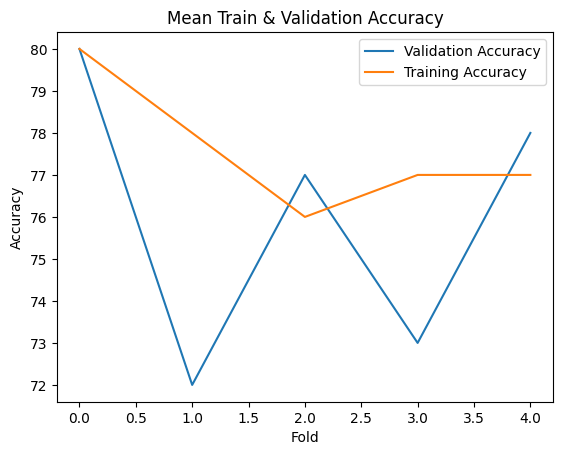

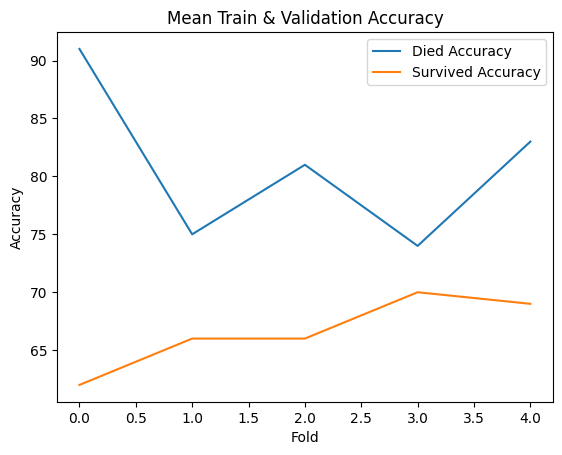

In [ ]:
print("Overall Validation Accuracy :",Acc_Val)
print()
print("Overall Training Accuracy :",Acc_Train)
print()
print("Died Accuracy :",C0)
print()
print("Survived Accuracy  :",C1)
print()

print("Mean Overall Validation Accuracy :",sum(Acc_Val.values())/5)
print()
print("Mean Overall Train Accuracy :",sum(Acc_Train.values())/5)
print()
print("Mean Died Accuracy :",sum(C0.values())/5)
print()
print("Mean Survived Accuracy  :",sum(C1.values())/5)
print()

plt.style.use('default')

plt.plot(list(Acc_Val.keys()),list(Acc_Val.values()))
plt.plot(list(Acc_Train.keys()),list(Acc_Train.values()))
plt.legend(["Validation Accuracy","Training Accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Fold")
plt.title("Mean Train & Validation Accuracy")
plt.show()

plt.plot(list(C0.keys()),list(C0.values()))
plt.plot(list(C1.keys()),list(C1.values()))
plt.legend(["Died Accuracy","Survived Accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Fold")
plt.title("Mean Train & Validation Accuracy")
plt.show()

Probabilities of Top Class : [0.54, 0.9, 0.88, 0.75, 0.74, 0.79, 0.9, 0.71, 0.76, 0.79, 0.79, 0.91, 0.88, 0.9, 0.64, 0.91, 0.88, 0.76, 0.64, 0.71, 0.74, 0.55, 0.91, 0.82, 0.9, 0.74, 0.74, 0.9, 0.76, 0.64, 0.93, 0.79, 0.81, 0.71, 0.55, 0.74, 0.9, 0.52, 0.9, 0.9, 0.59, 0.91, 0.79, 0.78, 0.59, 0.59, 0.96, 0.54, 0.93, 0.9, 0.64, 0.9, 0.91, 0.71, 0.76, 0.74, 0.7, 0.88, 0.91, 0.64, 0.76, 0.91, 0.64, 0.55, 0.51, 0.9, 0.52, 0.54, 0.85, 0.81, 0.91, 0.91, 0.9, 0.96, 0.74, 0.9, 0.76, 0.74, 0.78, 0.88, 0.79, 0.72, 0.93, 0.74, 0.85, 0.85, 0.81, 0.88, 0.78, 0.9, 0.9, 0.74, 0.74, 0.9, 0.59, 0.9, 0.85, 0.9, 0.64, 0.93, 0.52, 0.91, 0.92, 0.9, 0.54, 0.91, 0.91, 0.81, 0.52, 0.81, 0.79, 0.9, 0.76, 0.54, 0.9, 0.9, 0.74, 0.74, 0.93, 0.9, 0.9, 0.82, 0.88, 0.54, 0.9, 0.9, 0.91, 0.76, 0.52, 0.51, 0.93, 0.64, 0.71, 0.59, 0.52, 0.54, 0.79, 0.7, 0.9, 0.86, 0.93, 0.81, 0.88, 0.91, 0.9, 0.78, 0.9, 0.7, 0.86, 0.74, 0.64, 0.52, 0.52, 0.88, 0.78, 0.91, 0.64, 0.91, 0.71, 0.58, 0.91, 0.78, 0.9, 0.52, 0.54, 0.52, 0.91, 0

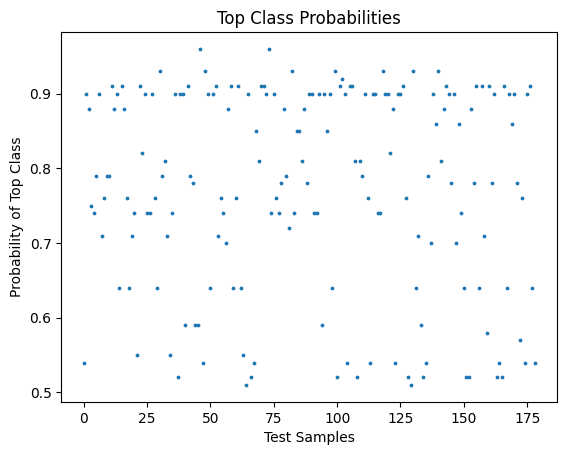

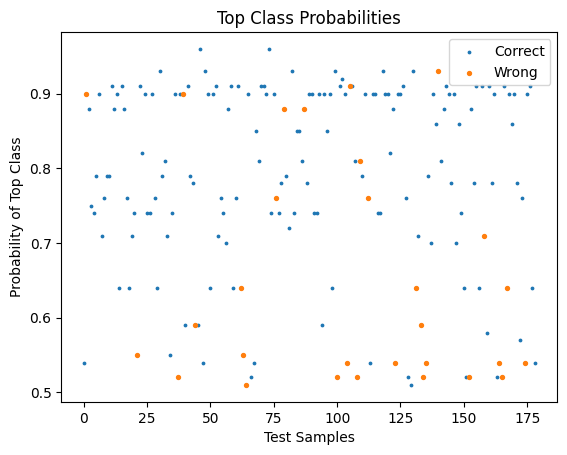

In [ ]:
NB = NaiveBayes()
NB.train(x_train,y_train)   
Predictions = NB.predict_probability(x_test)

Prob_Top = [round(max(pr.values()),2) for pr in Predictions]
print("Probabilities of Top Class :",Prob_Top)
print()
print("Mean of Top Class Probabilities :",sum(Prob_Top)/len(Prob_Top))
print() 

plt.scatter(list(range(len(Prob_Top))),Prob_Top,s=3)
plt.xlabel("Test Samples")
plt.ylabel("Probability of Top Class")
plt.title("Top Class Probabilities")
plt.show()

Prob_C = {}
Prob_W = {}
Predictions = NB.predict(x_test)
for i in range(len(Prob_Top)) : 
  if(Predictions[i]==y_test.iloc[i]) : Prob_C[i] = Prob_Top[i]
  else : Prob_W[i] = Prob_Top[i]

plt.scatter(list(Prob_C.keys()),list(Prob_C.values()),s=3)
plt.scatter(list(Prob_W.keys()),list(Prob_W.values()),s=8)
plt.xlabel("Test Samples")
plt.ylabel("Probability of Top Class")
plt.title("Top Class Probabilities")
plt.legend(["Correct","Wrong"])
plt.show()

###6) Scratch vs Inbuilt Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB
import time

NB_Inbuilt = CategoricalNB()
now = time.time()
NB_Inbuilt.fit(x_train, y_train)
Tr_Inbuilt = time.time()-now
Pred_Inbuilt = NB_Inbuilt.predict(x_test)
Pr_Inbuilt = time.time()-now-Tr_Inbuilt


NB_Scratch = NaiveBayes()
now = time.time()
NB_Scratch.train(x_train, y_train)
Tr_Scratch = time.time()-now
Pred_Scratch = NB_Scratch.predict(x_test)
Pr_Scratch = time.time()-now-Tr_Scratch

print("Inbuilt :")
print()
print("Overall Accuracy:",average(y_test,Pred_Inbuilt),"%\n\nClass-Wise Accurcy :")
print_cw(class_wise_average(y_test,Pred_Inbuilt),["Died","Survived"])
print("Training Time :",round(Tr_Inbuilt*1000),"ms")
print("Prediction Time :",round(Pr_Inbuilt*1000),"ms")
print()
print("================================")
print()
print("Scratch :")
print()
print("Overall Accuracy:",average(y_test,Pred_Scratch),"%\n\nClass-Wise Accurcy :")
print_cw(class_wise_average(y_test,Pred_Scratch),["Died","Survived"])
print("Training Time :",round(Tr_Scratch*1000),"ms")
print("Prediction Time :",round(Pr_Scratch*1000),"ms")

Inbuilt :

Overall Accuracy: 84 %

Class-Wise Accurcy :
		Survived : 82 %
		Died     : 84 %

Training Time : 3 ms
Prediction Time : 2 ms


Scratch :

Overall Accuracy: 84 %

Class-Wise Accurcy :
		Survived : 80 %
		Died     : 85 %

Training Time : 433 ms
Prediction Time : 136 ms


##Binning

#####Importing Data

In [ ]:
import pandas as pd
import time

df = pd.read_csv(path+'dataset.csv')

str_to_num(df)

df.head(4)

,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1


###a) Histogram

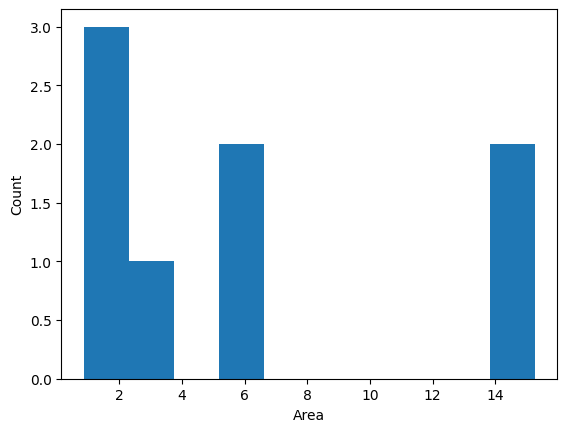

In [ ]:
plt.hist(df.iloc[0])
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

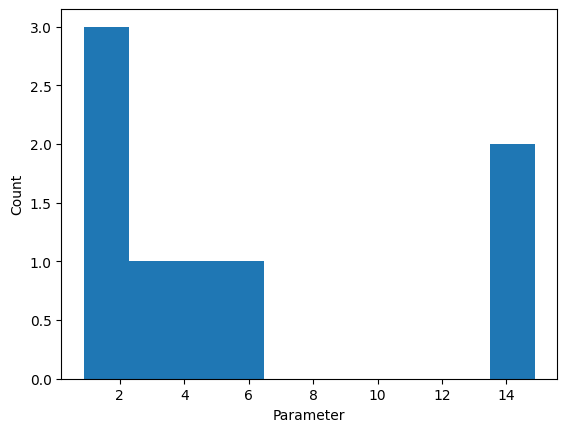

In [ ]:
plt.hist(df.iloc[1])
plt.xlabel("Parameter")
plt.ylabel("Count")
plt.show()

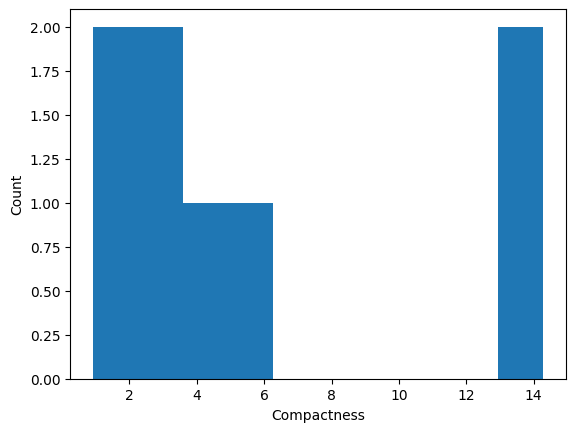

In [ ]:
plt.hist(df.iloc[2])
plt.xlabel("Compactness")
plt.ylabel("Count")
plt.show()

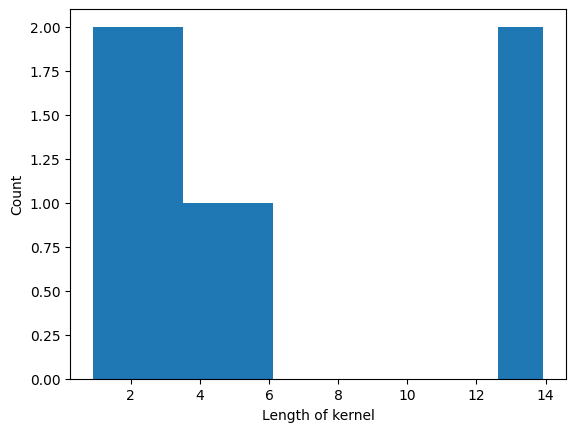

In [ ]:
plt.hist(df.iloc[3])
plt.xlabel("Length of kernel")
plt.ylabel("Count")
plt.show()

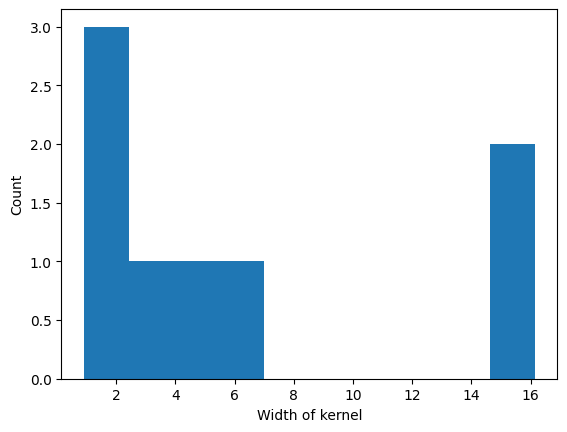

In [ ]:
plt.hist(df.iloc[4])
plt.xlabel("Width of kernel")
plt.ylabel("Count")
plt.show()

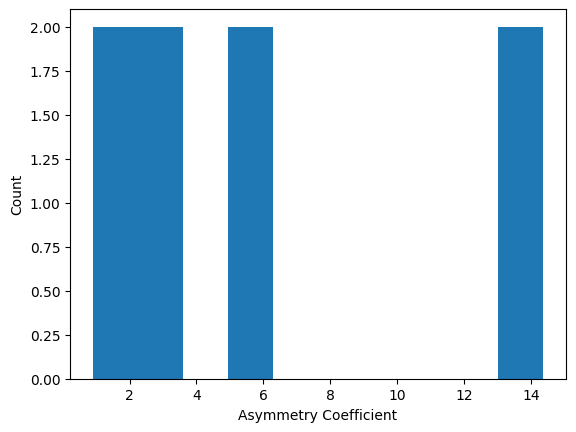

In [ ]:
plt.hist(df.iloc[5])
plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Count")
plt.show()

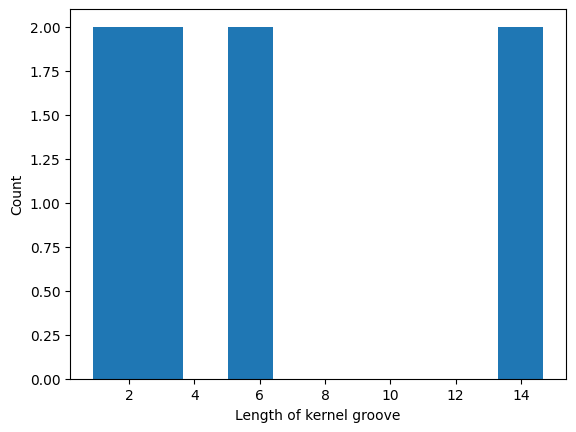

In [ ]:
plt.hist(df.iloc[6])
plt.xlabel("Length of kernel groove")
plt.ylabel("Count")
plt.show()

###b) Prior Probabilities

In [ ]:
y = df.iloc[:,-1]

prior = dict(y.value_counts())
s = sum(prior.values())
for i in prior.keys() : 
  prior[i] = prior[i]/s

for i in prior.keys() : 
  print("Prior of",i,":",prior[i])

Prior of 1 : 0.3333333333333333
Prior of 2 : 0.3333333333333333
Prior of 3 : 0.3333333333333333


###c) Discretizing Features

In [ ]:
def discretize(df,col,binsize=None,bins=5,mn=None,mx=None) :
  if mn is None : mn = min(df[col])
  if mx is None : mx = max(df[col])
  if binsize is None : binsize = (mx-mn)/bins
  for i in range(len(df[col])) : 
    df[col][i] = int((df[col][i]-mn)/binsize)
    if(df[col][i]==bins) : df[col][i] = bins-1
  df[col] = df[col].astype(int)
  return binsize

def discretize_all(df,binsize=None,bins=5,exceptions=[]) :
  bin = {}
  if(-1 in exceptions) : exceptions.append(len(df.columns)-1) 
  for col in df :
    if df.columns.get_loc(col) not in exceptions :  
      if df[col].unique().size>10 :  
        bin[col] = discretize(df,col,binsize,bins)
  return bin

print(df.head())

bin = discretize_all(df,exceptions=[-1])
print()

print(df.head())

print()
print("Binsizes :",bin)

      X0     X1      X2     X3     X4     X5     X6  Y
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1

   X0  X1  X2  X3  X4  X5  X6  Y
0   2   2   2   2   2   0   1  1
1   2   2   3   1   2   0   1  1
2   1   1   4   1   2   1   0  1
3   1   1   3   1   2   0   0  1
4   2   2   4   2   3   0   1  1

Binsizes : {'X0': 2.118, 'X1': 0.968, 'X2': 0.022039999999999994, 'X3': 0.35519999999999996, 'X4': 0.28060000000000007, 'X5': 1.5381799999999999, 'X6': 0.40619999999999995}


###d) Class Conditionals


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

prior = dict(y.value_counts())
 
likelihood = {} 

for w in prior.keys() : likelihood[w] = {}

for w in prior.keys() : 
  xw = x.loc[y==w]
  for col in xw : 
    likelihood[w][col] = dict(xw[col].value_counts())
    all = list(x[col].unique())
    for i in likelihood[w][col].keys() : 
      likelihood[w][col][i] = round(likelihood[w][col][i]/prior[w],2)
      all.remove(i)
    for i in all : 
      likelihood[w][col][i] = 0

for w in likelihood.keys() : 
  print(f"Class {w} -")
  print()
  for fet in likelihood[w].keys() : 
    print(fet,":",likelihood[w][fet])
  print()

Class 1 -

X0 : {1: 0.59, 2: 0.33, 0: 0.07, 3: 0.01, 4: 0}
X1 : {2: 0.47, 1: 0.44, 0: 0.06, 3: 0.03, 4: 0}
X2 : {3: 0.44, 2: 0.36, 4: 0.17, 1: 0.03, 0: 0}
X3 : {1: 0.5, 2: 0.34, 0: 0.14, 3: 0.01, 4: 0}
X4 : {2: 0.51, 1: 0.36, 3: 0.09, 0: 0.04, 4: 0}
X5 : {0: 0.44, 1: 0.39, 2: 0.14, 3: 0.03, 4: 0}
X6 : {1: 0.59, 0: 0.26, 2: 0.14, 3: 0.01, 4: 0}

Class 2 -

X0 : {3: 0.5, 4: 0.29, 2: 0.21, 1: 0, 0: 0}
X1 : {3: 0.46, 4: 0.43, 2: 0.11, 1: 0, 0: 0}
X2 : {3: 0.44, 4: 0.29, 2: 0.26, 1: 0.01, 0: 0}
X3 : {3: 0.54, 4: 0.24, 2: 0.19, 1: 0.03, 0: 0}
X4 : {4: 0.46, 3: 0.39, 2: 0.16, 1: 0, 0: 0}
X5 : {1: 0.44, 2: 0.31, 0: 0.17, 3: 0.07, 4: 0}
X6 : {3: 0.59, 4: 0.34, 2: 0.06, 1: 0.01, 0: 0}

Class 3 -

X0 : {0: 0.87, 1: 0.13, 2: 0, 3: 0, 4: 0}
X1 : {0: 0.6, 1: 0.4, 2: 0, 3: 0, 4: 0}
X2 : {1: 0.34, 2: 0.3, 0: 0.21, 3: 0.11, 4: 0.03}
X3 : {0: 0.6, 1: 0.4, 2: 0, 3: 0, 4: 0}
X4 : {0: 0.66, 1: 0.33, 2: 0.01, 3: 0, 4: 0}
X5 : {2: 0.49, 3: 0.23, 1: 0.16, 4: 0.07, 0: 0.06}
X6 : {1: 0.81, 0: 0.1, 2: 0.09, 3: 0

###e) Count of Unique Elements for Each Class

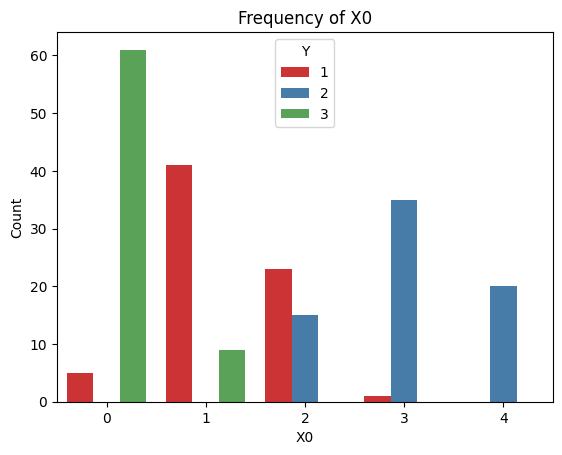

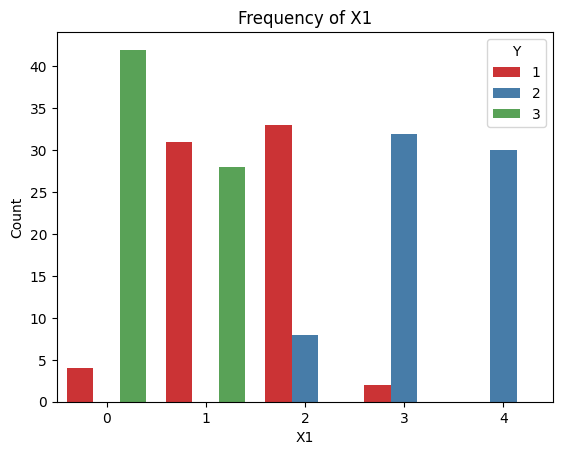

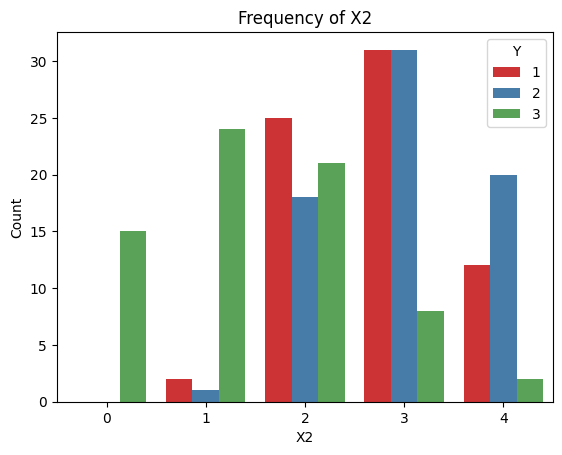

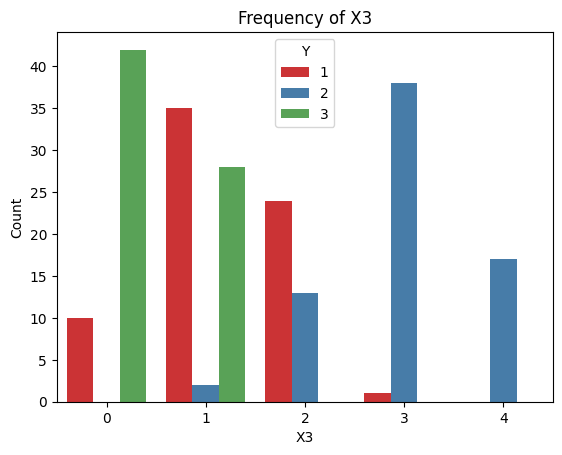

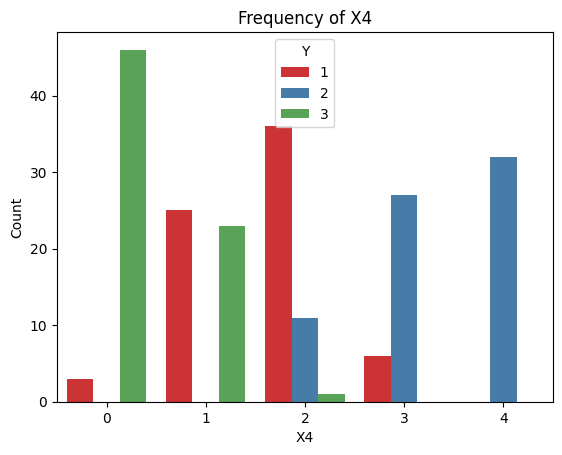

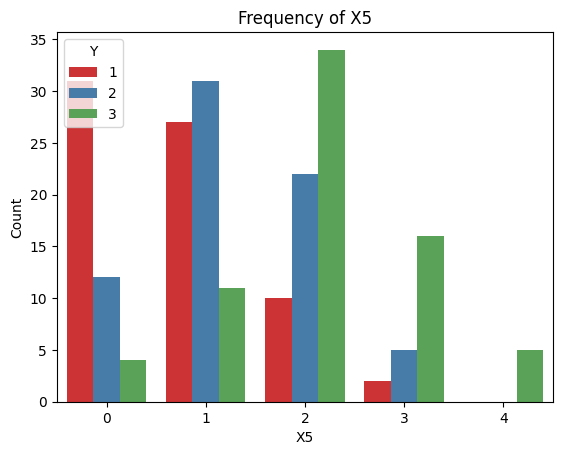

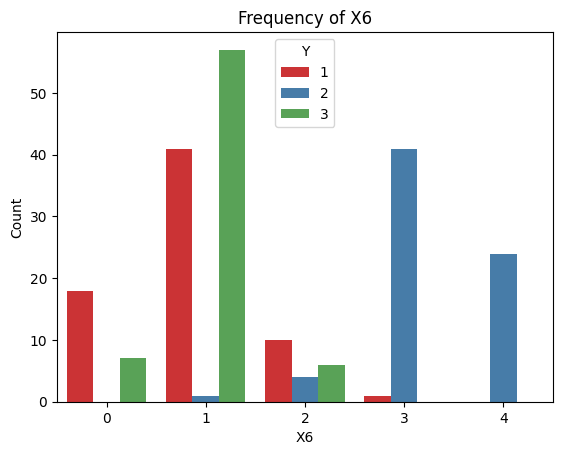

In [ ]:
columns = df.columns
for i in range(0,7):
  sb.countplot(x=df.iloc[:,i],hue='Y',data=df,palette='Set1')
  plt.xlabel(columns[i])
  plt.ylabel("Count")
  plt.title(f"Frequency of {columns[i]}")
  plt.show()

###f) Posterior Probabilities

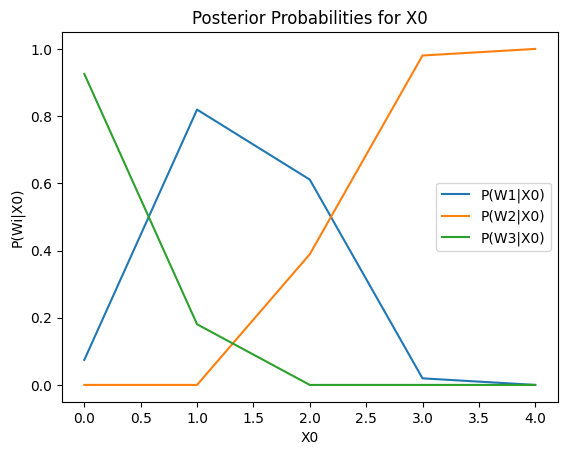


{1: [0.07446808510638299, 0.8194444444444444, 0.6111111111111112, 0.0196078431372549, 0.0], 2: [0.0, 0.0, 0.3888888888888889, 0.9803921568627451, 1.0], 3: [0.9255319148936171, 0.18055555555555555, 0.0, 0.0, 0.0]}




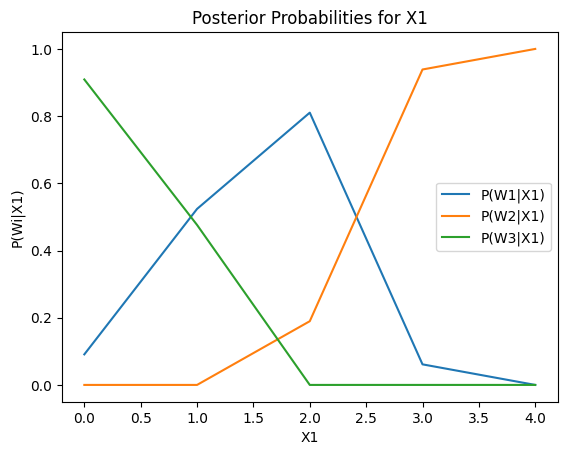


{1: [0.09090909090909091, 0.5238095238095238, 0.8103448275862069, 0.06122448979591836, 0.0], 2: [0.0, 0.0, 0.1896551724137931, 0.9387755102040816, 1.0], 3: [0.9090909090909091, 0.4761904761904762, 0.0, 0.0, 0.0]}




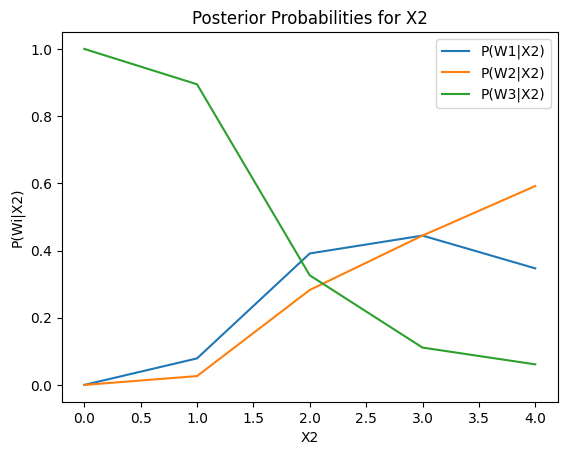


{1: [0.0, 0.07894736842105263, 0.3913043478260869, 0.4444444444444445, 0.34693877551020413], 2: [0.0, 0.026315789473684213, 0.2826086956521739, 0.4444444444444445, 0.5918367346938775], 3: [1.0, 0.8947368421052632, 0.3260869565217391, 0.11111111111111112, 0.06122448979591837]}




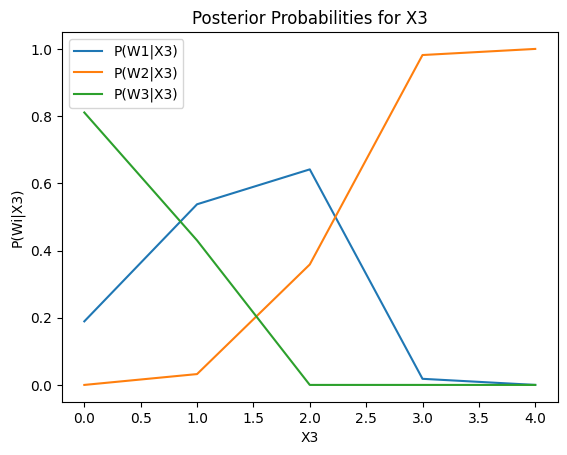


{1: [0.1891891891891892, 0.5376344086021506, 0.6415094339622641, 0.01818181818181818, 0.0], 2: [0.0, 0.03225806451612904, 0.3584905660377359, 0.9818181818181817, 1.0], 3: [0.8108108108108109, 0.4301075268817205, 0.0, 0.0, 0.0]}




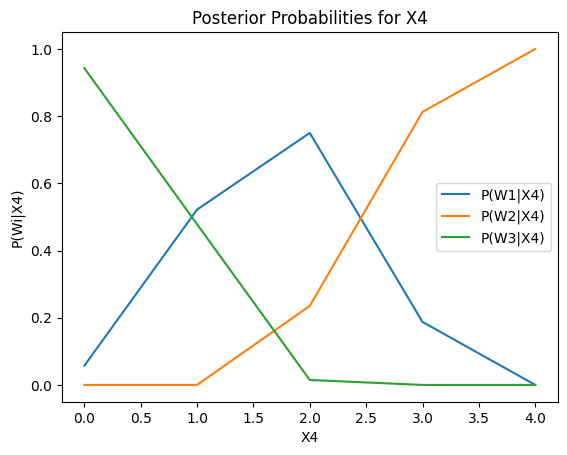


{1: [0.05714285714285715, 0.5217391304347826, 0.7499999999999999, 0.1875, 0.0], 2: [0.0, 0.0, 0.2352941176470588, 0.8125, 1.0], 3: [0.942857142857143, 0.47826086956521746, 0.014705882352941175, 0.0, 0.0]}




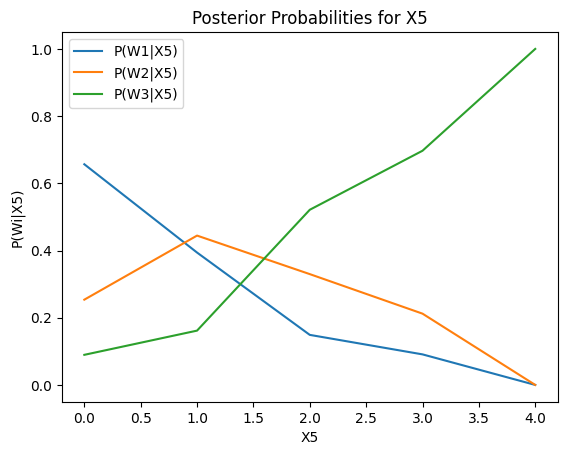


{1: [0.6567164179104477, 0.393939393939394, 0.14893617021276598, 0.09090909090909091, 0.0], 2: [0.25373134328358204, 0.4444444444444445, 0.32978723404255317, 0.21212121212121213, 0.0], 3: [0.08955223880597014, 0.16161616161616163, 0.5212765957446809, 0.696969696969697, 1.0]}




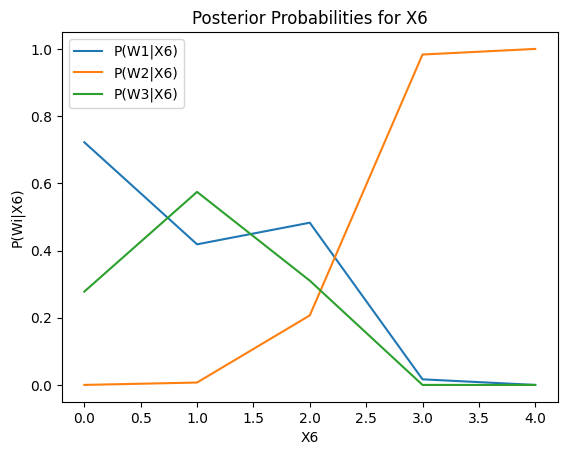


{1: [0.7222222222222222, 0.4184397163120567, 0.4827586206896552, 0.01666666666666667, 0.0], 2: [0.0, 0.007092198581560284, 0.20689655172413793, 0.9833333333333333, 1.0], 3: [0.2777777777777778, 0.574468085106383, 0.31034482758620685, 0.0, 0.0]}




In [ ]:
prior = dict(y.value_counts())

for col in x :  
  
  unq = x[col].unique()
  unq = sorted(list(unq))
  pr = {}
  psum = [0]*len(unq)
  for w in prior.keys() :  
    pr[w] = []
    for i,val in enumerate(unq) : 
      p = prior[w]
      p = p * likelihood[w][col][val]
      pr[w].append(p)
      psum[i] = psum[i] + p
    
  for w in prior.keys() :
    pr[w] = [a/b for a,b in zip(pr[w],psum)]  
    plt.plot(unq,pr[w])

  plt.xlabel(col)
  plt.ylabel(f"P(Wi|{col})")
  plt.title(f"Posterior Probabilities for {col}")
  plt.legend([f"P(W{j}|{col})" for j in prior.keys()])
  plt.show()

  print()
  print(pr)  
  print()
  print()  